# Lecture 15 - Nucleation and Crystal Growth

## Motivation:

Up until now, we've spoken abou phase changes occuring exactly when the free energy of a system indicates is should, and indeed, the thermodynamic marker is correct.

But atomically what is happening when we create a bond?

Consider: 

- I have a ball in a vacuum. The ball is at 0 C, the background is 4 C
- I have a ball in a bowl of water. The ball is at 0 C, the background at 4C

Which will go up in temperature faster?

The ball in water, because of the multiple mechanisms available for heat transfer.

So what happens to atom at the freezing point before it freezes?

It has to give up some energy before it can freeze. How much -> $\Delta H_{fusion}$

So, where does that go? Well into the immediate environment

if the immeadiate environment is at the same temperature, there's no where for the heat to go.

So until we can find a place to dump the energy, the system stays in the original state *even though it would be thermodynamically beneficial to not be in that state*




Free energy for a melt:
$$G_L = H_L - TS_L$$
And for a crystal:
$$G_S = H_S - TS_S$$

Through the solidfication
$$\Delta G = G_S - G_L = \Delta H - T \Delta S$$

When $T = T_m$ , $\Delta G = 0$ so

$$\Delta H_m = T_m \Delta S_m$$


## Homogeneous Nucleation

$$\gamma_{CL} = \left(\frac{z-z_s}{z}\right)\frac{\Delta H_f}{N_A \Omega^{2/3}}$$


$$\Delta G_V = (T_m - T) \Delta S_V$$

Assume a sphere where:
$$\Delta G_\text{vol} = \frac{4\pi}{3}r^3 (T_m - T)\Delta S_V $$

and at the surface

$$\Delta G_\text{surf} = 4\pi r^2 \gamma_{CL} $$

So together: 
$$\Delta G = \Delta G_\text{vol}+\Delta G_\text{surf}$$
$$\Delta G = \frac{4\pi}{3}r^3 (T_m - T)\Delta S_V  +  4\pi r^2\gamma_{CL}$$

Oh look, an equation we can plot

In [2]:
import sys
sys.path.append("/pithy/code/")
from pithy import *
%matplotlib inline

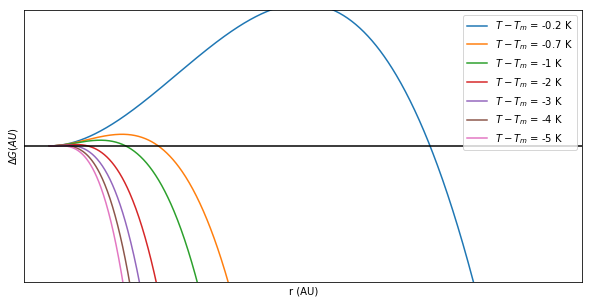

In [14]:
r = linspace(0,100,1000) #radius

Tm = 273
dSv = -20
gamma_cl = 100
figure(figsize=(10,5))
for T in [272.8,272.3,272,271,270,269,268]:
    dGtot = 4*pi/3 * r**3 *(Tm-T)*dSv + 4*pi*r**2*gamma_cl
    plot(r,dGtot,label="$T - T_m$ = -"+str(Tm-T)+" K")

axhline(0,color='k')
legend()
ylim(-1000000,1000000)    
ylabel("$\Delta G (AU)$")
xlabel("r (AU)")
xticks([])
yticks([])
show()

So at the critical nucleation radius $r^*$

$$\frac{d\Delta G}{dr} = 4r^2 (T_m - T)\Delta S_V  +  8\pi r\gamma_{CL} = 0$$

$$T = T_m-\frac{2\gamma_{CL}}{r|\Delta S_V|} $$

## Hetergenous Nucleation

$$\gamma_{SL} = \gamma_{SC}+\gamma_{CL}\cos(\theta) $$

$$\Delta G_{surf} = \pi r^2 (\gamma_{SC} +\gamma_{CL}-\gamma_{SL}) $$

$$\Delta G_{tot}^{het}(R^*) = \Delta G_{tot}^{hom}(R^*) f(\theta) $$
$$f(\theta) = \frac{2-3\cos(\theta)+cos^3(\theta)}{4}$$



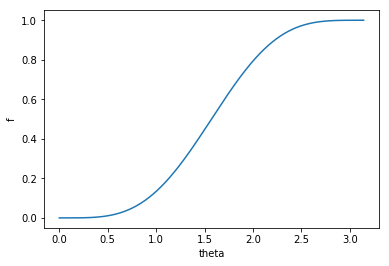

In [4]:
theta = linspace(0,pi,1000)
f = (2-3*cos(theta)+cos(theta)**3)/4

plot(theta,f)
xlabel("theta")
ylabel("f")
show()

0.0
0.05805826175840775
0.49999999999999994
1.0


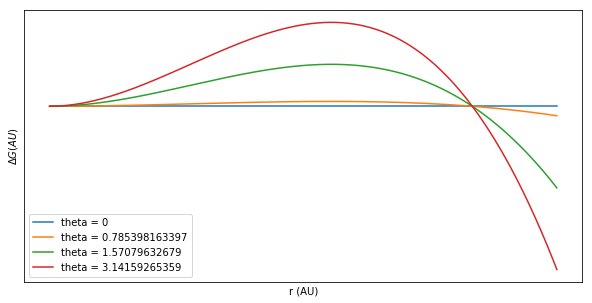

In [5]:
r = linspace(0,18,1000) #radius
Tm = 273
T = 272
dSv = -20
gamma_cl = 100
figure(figsize=(10,5))
for theta in [0,pi/4,pi/2,pi]:
    f = (2-3*cos(theta)+cos(theta)**3)/4
    print f
    dGtot = 4*pi/3 * r**3 *(Tm-T)*dSv + 4*pi*r**2*gamma_cl  
    dGtot_het = dGtot*f
    plot(r,dGtot_het,label="theta = "+str(theta))

legend()
ylabel("$\Delta G (AU)$")
xlabel("r (AU)")
xticks([])
yticks([])
show()

## Solid Solid Nucelation

What might we have to add?

Let's start with

$$\Delta G = V \Delta G_V + A\gamma_{CC} + \Delta G_{strain} - \Delta G_{defects}  $$

### Effects of Strain

The strain is a function of the shape, so for a sphere:

$$\Delta G_{strain} = \left( \frac{2K_\beta\mu_\alpha}{3K_\beta+4\mu_\alpha} \right)\epsilon^2 V_\beta$$

For an ellipse
$$\Delta G_{strain} = \left( \frac{2\mu_\alpha}{3} \right)\epsilon^2 V_\beta E(y/r)$$

### Effects of Defects

<img src="http://steingart.princeton.edu/sharetron/Screen-Shot-2017-11-08-13-50-25.png">

<img src="http://steingart.princeton.edu/sharetron/Screen-Shot-2017-11-08-13-50-54.png">

 

## Kinetics of Nucleation

Let's grow embryo $\beta_i + \beta_1 = \beta_{i+1} $

Break down the energy not to volume, but number of attoms, such that

$$\Delta F_i = i\Delta \mu + 4i^{2/3}\gamma$$ 


The number of atoms having in embryos **in total** can be expressed as

$$n_i^e = n_{total}e^{-\Delta F/kT}$$

So we can determine the fraction of embroy's at a given undercooling.



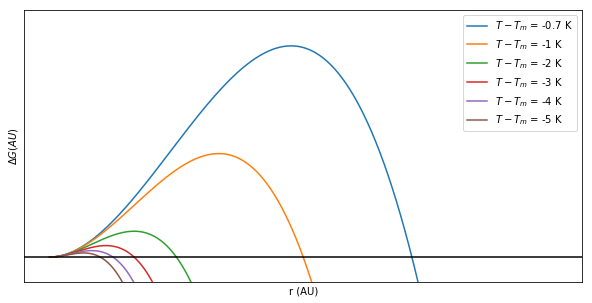

In [6]:
r = linspace(0,30,1000) #radius

Tm = 273
dSv = -20
gamma_cl = 100
figure(figsize=(10,5))
for T in [272.3,272,271,270,269,268]:
    dGtot = 4*pi/3 * r**3 *(Tm-T)*dSv + 4*pi*r**2*gamma_cl
    plot(r,dGtot,label="$T - T_m$ = -"+str(Tm-T)+" K")

axhline(0,color='k')
legend()
ylim(-10000,100000)    
ylabel("$\Delta G (AU)$")
xlabel("r (AU)")
xticks([])
yticks([])
show()

What does it meean that certain clusters are energetically unfavorable?  Well, at any point in time

Text(0.5,0,'number of atoms')

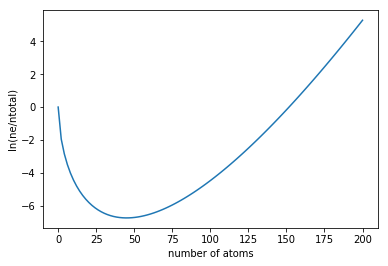

In [7]:
i = linspace(0,200,100)
c = .3
dT = 1.
Tm = 4
p1 = -i*(3*dT/Tm)+4*i**(2./3)
p2 = -p1*c/(1-(dT/Tm))
ratio = exp(p2)
plot(i,log(ratio))
ylabel("ln(ne/ntotal)")
xlabel("number of atoms")


what this indicates is that at the critical nucleus, size, an equal number of embryos are deectroid and created.

DS go to page 282 here